# The Gender Pay Gap in the General Social Survey
Wage data from the General Social Survey (1974-2018) to illustrate wage discrepancies by gender (while also considering respondent occupation, age, and education).

Name: Evan Goldenberg

ID: 100826897

## Introduction
The gender pay gap or gender wage gap is the mean difference between the annual salary for men and women who work. Women are generally found to be paid less than men. There are two distinct numbers regarding the pay gap: non-adjusted versus adjusted pay gap. The adjusted pay gap typically takes into account differences in hours worked, occupations chosen, education and job experience. In the United States, for example, the non-adjusted average woman's annual salary is 79% of the average man's salary, compared to 95% for the adjusted average salary.

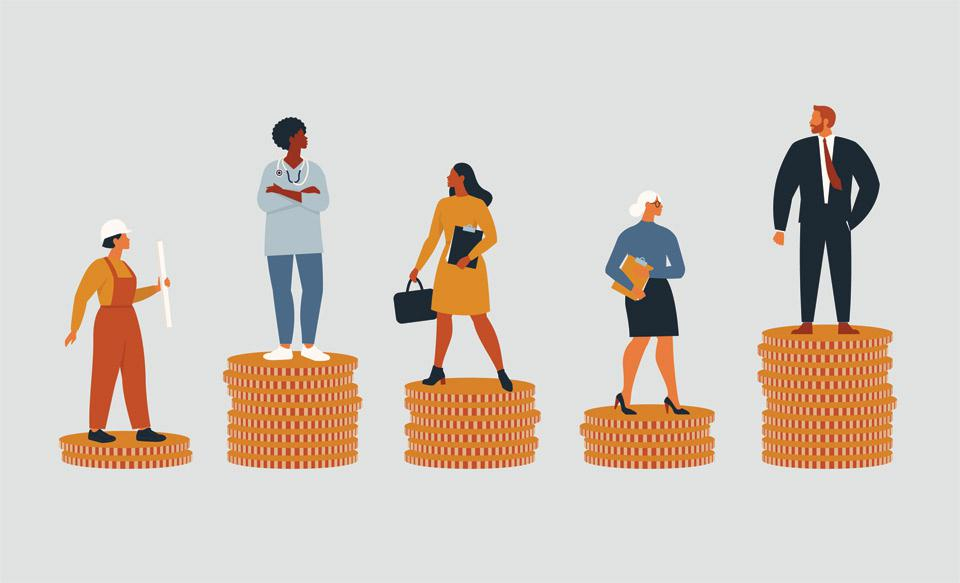

## Importing Data

In [1]:
# libraries required

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

A subset of data from a this survey is maintained publicly at [Rdatasets](https://vincentarelbundock.github.io/Rdatasets/csv/stevedata/gss_wages.csv), a free online resource of general datasets [1].

In [2]:
# Loading Data
survey_data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/stevedata/gss_wages.csv')

### Data Cleaning

Some of the column names are hard to understand so I will rename them to something more clear. Many people in the data set don't have all information listed, so I will remove any person with missing data. Otherwise the data is quite clean, for example all of the income is in 1986 USD (already accounts for inflation).

In [3]:
# Rename columns
survey_data.columns = ["", "year", "income", "age", "occupational_code", "occupation", "prestige_score", "children", "work_status", "gender", "education_level", "marital_status"]

# Making all decimal places 2
pd.set_option('display.precision', 2)

# removing all rows missing data
survey_data = survey_data.dropna(axis=0)
survey_data

,,year,income,age,occupational_code,occupation,prestige_score,children,work_status,gender,education_level,marital_status
0,1,1974,4935.0,21.0,5620.0,Office and Administrative Support,25.0,0.0,School,Male,High School,Married
1,2,1974,43178.0,41.0,2040.0,Professional,66.0,3.0,Full-Time,Male,Bachelor,Married
4,5,1974,18505.0,58.0,5820.0,Office and Administrative Support,37.0,0.0,Full-Time,Female,High School,Never Married
5,6,1974,22206.0,30.0,910.0,Business/Finance,45.0,0.0,School,Male,Bachelor,Married
6,7,1974,55515.0,48.0,230.0,Business/Finance,59.0,2.0,Full-Time,Male,Graduate,Married
...,...,...,...,...,...,...,...,...,...,...,...,...
61684,61685,2018,17025.0,54.0,3230.0,Professional,59.0,0.0,Full-Time,Female,Graduate,Married
61685,61686,2018,4086.0,25.0,2710.0,Professional,58.0,0.0,Full-Time,Female,Bachelor,Never Married
61688,61689,2018,14755.0,29.0,4760.0,Sales,31.0,0.0,Full-Time,Female,High School,Married
61693,61694,2018,7377.5,75.0,4720.0,Sales,28.0,4.0,Part-Time,Female,High School,Married


Note that the number of data points has decreased from 61697 to 37185 after cleaning the data.

## Analysis

I will be exploring how age, occupation, gender, education, and martial status effect income.

In [4]:
statistical_analysis = survey_data.describe().loc[['mean','std','min','max']]
statistical_analysis

,,year,income,age,occupational_code,prestige_score,children
mean,30932.86,1996.15,22310.07,40.97,4504.29,43.82,1.69
std,17406.06,12.50,28632.45,13.50,2610.24,13.09,1.61
min,1.00,1974.00,227.00,18.00,10.00,16.00,0.00
max,61695.00,2018.00,480144.47,89.00,9830.00,80.00,8.00


From the statistical analysis above we can see that this data was collected from 1974 to 2018. The average year this data was collected in is 1996. The average income is $22310.07 and average age is 40.97 years old. On average people have 1.69 children.

### Distributions 

<AxesSubplot:>

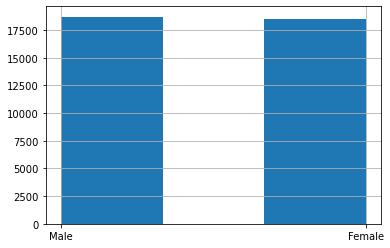

In [5]:
# Figure 1
survey_data.gender.hist(bins=3)

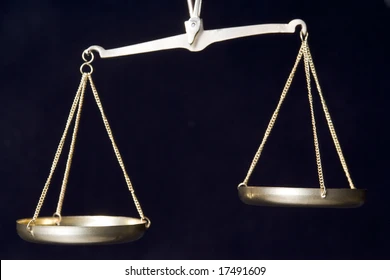

The amount of men and women is about equal.

#### First lets take a look at the average income for each gender

In [6]:
survey_data.groupby('gender', as_index=False).income.mean()

,gender,income
0,Female,16067.88
1,Male,28469.20


There is a large gap between male and female average income.

#### Why, on average, do men make more then women?

In [7]:
survey_data.groupby('occupation', as_index = False).income.mean().sort_values(by='income', ascending=False)

,occupation,income
1,Business/Finance,39016.75
7,Professional,28433.47
4,"Installation, Maintenance, and Repair",23621.17
0,Armed Forces,23232.36
8,Sales,22819.72
2,Construction/Extraction,20278.17
10,Transportation,19716.33
6,Production,18179.38
5,Office and Administrative Support,15657.73
3,"Farming, Fishing, and Forestry",12246.01


The table above shows the most lucrative occupations (greatest income (top) to lowest income (bottom).

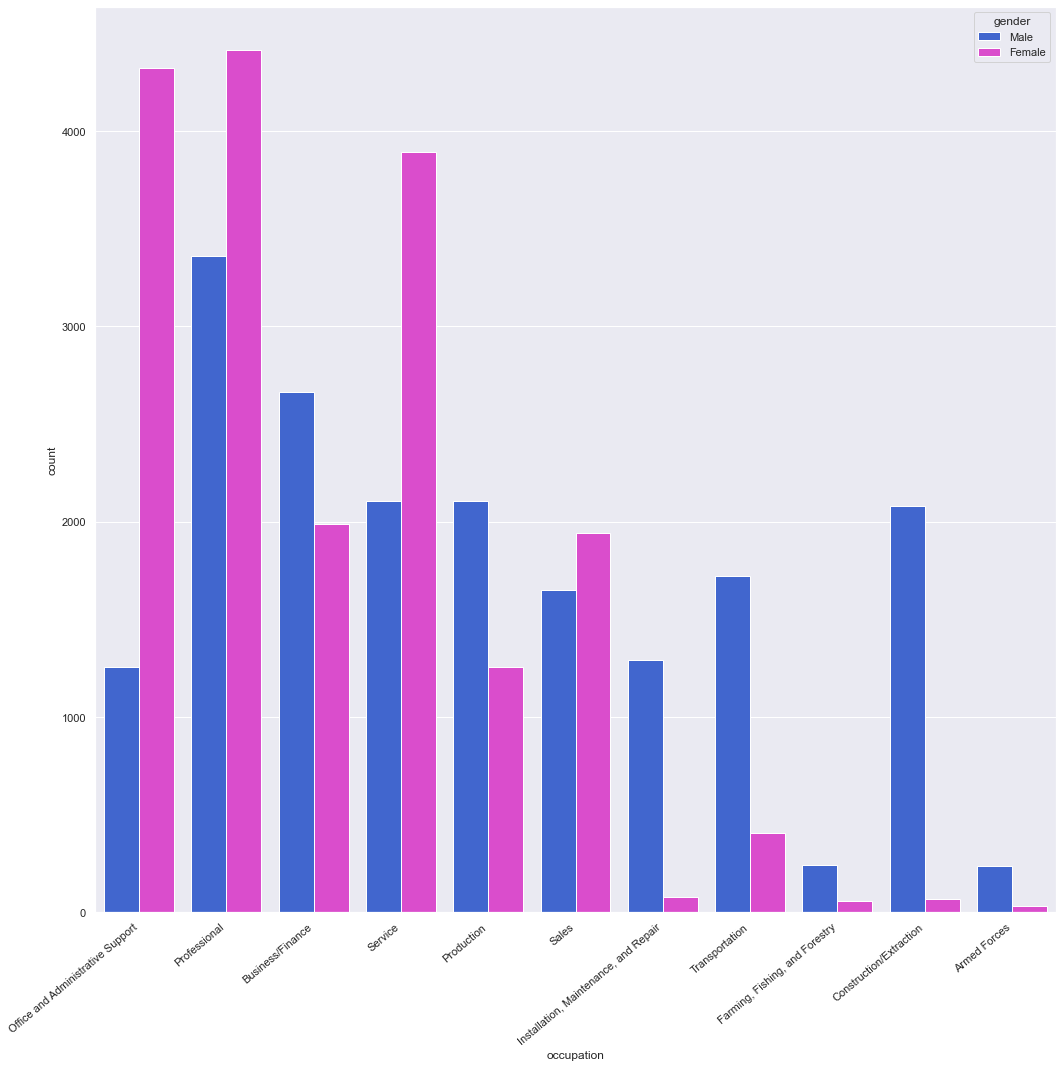

In [8]:
# Figure 2

sns.set(rc={'figure.figsize':(15,15)})
p = sns.countplot(data=survey_data, x="occupation", hue="gender", palette=['#295be6','#f235df'])
p.set_xticklabels(p.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

From the chart above we can see that many occupations have a massive inbalance in gender. Which can lead to inbalances in income because not all occupations pay the same.

The top 3 paying occupations are Business, Professional, and Maintenance, which all have more men working in them than women.

The bottom 3 paying occupations are Service, Farming, and Office. Farming. Which only farming has more men then women but there are very few people farming compared to people in service and office jobs. Serice and Office jobs are heavily dominated by women.

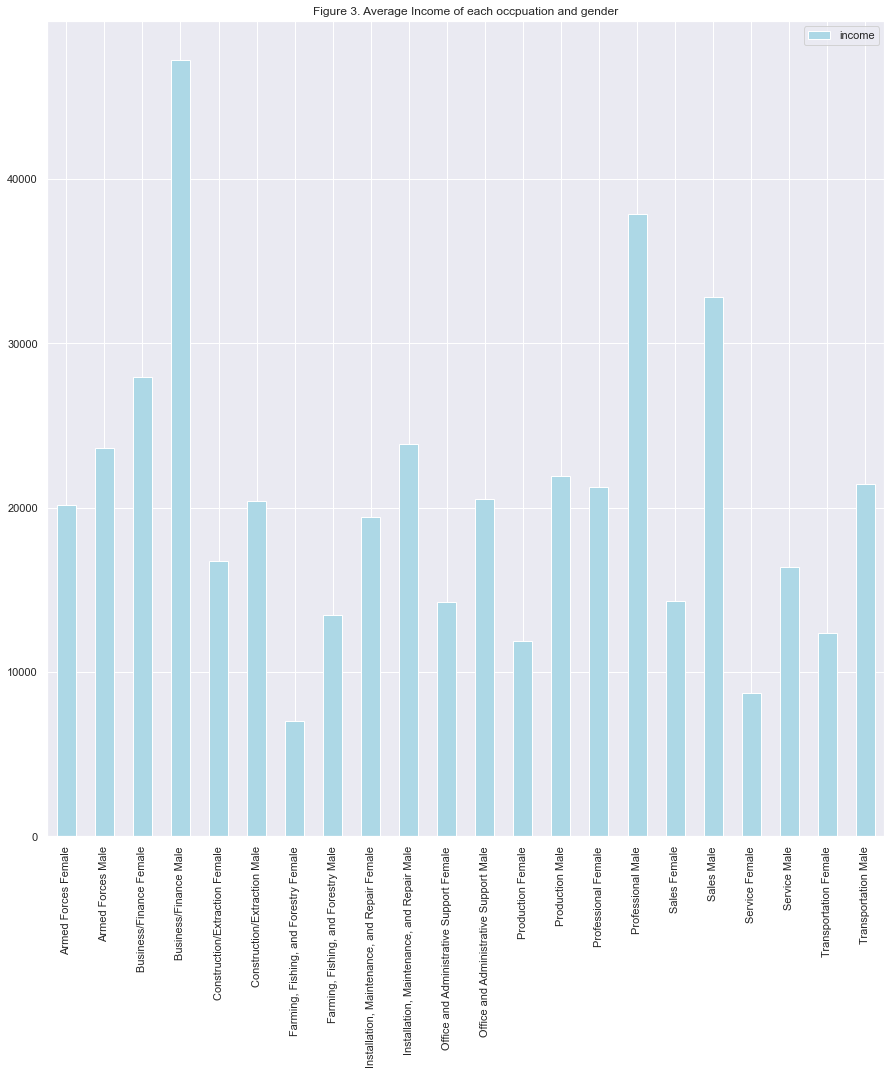

In [9]:
grouped = survey_data.groupby(['occupation','gender'], as_index=False).income.mean()
grouped = grouped.rename(index={0:'Armed Forces Female', 1:'Armed Forces Male',2:'Business/Finance Female',3:'Business/Finance Male',5:'Construction/Extraction Male',4:'Construction/Extraction Female',7:'Farming, Fishing, and Forestry Male',6:'Farming, Fishing, and Forestry Female',9:'Installation, Maintenance, and Repair Male',8:'Installation, Maintenance, and Repair Female',11:'Office and Administrative Support Male',10:'Office and Administrative Support Female',13:'Production Male',12:'Production Female',15:'Professional Male',14:'Professional Female',17:'Sales Male',16:'Sales Female',19:'Service Male',18:'Service Female',21:'Transportation Male',20:'Transportation Female'})
barplot = grouped.plot.bar(color='lightblue', title='Figure 3. Average Income of each occpuation and gender')

Well it might be true that women tend to choose jobs that pay less, even when they do pick jobs that pay well they get payed less.

For example the most lucerative occupation in our data set is Business or Finance. Men in finance make about 46000 on average, whereas Women in Business or Finance make about 28000 on average.

Another example is the difference between men and women in professional jobs.

Occupations like 'professional' or 'business' are very broad. So these jobs could mean a lot of different things. From this bar plot above we don't know how prestigious these jobs are.

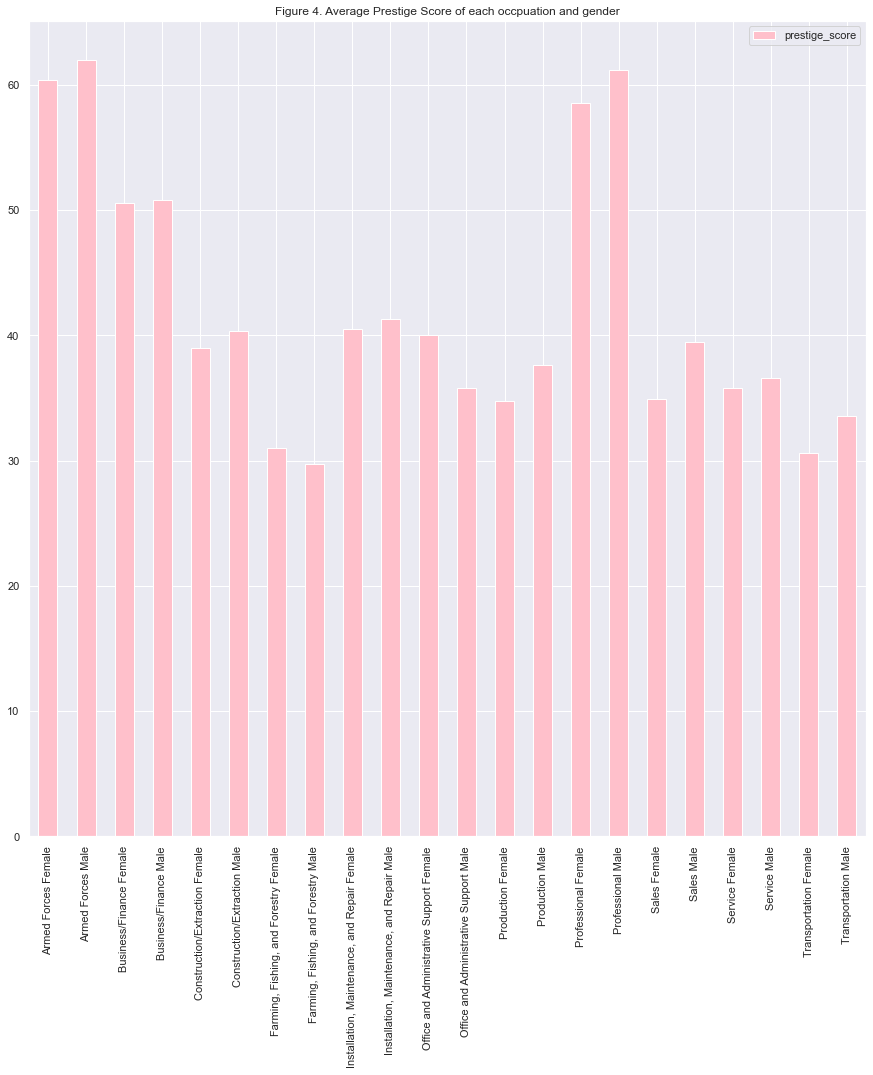

In [10]:
grouped = survey_data.groupby(['occupation','gender'], as_index=False).prestige_score.mean()
grouped = grouped.rename(index={0:'Armed Forces Female', 1:'Armed Forces Male',2:'Business/Finance Female',3:'Business/Finance Male',5:'Construction/Extraction Male',4:'Construction/Extraction Female',7:'Farming, Fishing, and Forestry Male',6:'Farming, Fishing, and Forestry Female',9:'Installation, Maintenance, and Repair Male',8:'Installation, Maintenance, and Repair Female',11:'Office and Administrative Support Male',10:'Office and Administrative Support Female',13:'Production Male',12:'Production Female',15:'Professional Male',14:'Professional Female',17:'Sales Male',16:'Sales Female',19:'Service Male',18:'Service Female',21:'Transportation Male',20:'Transportation Female'})
barplot = grouped.plot.bar(color='pink', title='Figure 4. Average Prestige Score of each occpuation and gender')

This bar plot tells us that men and women have very similar prestige scores in every occupation.

Another factor to consider is time worked.

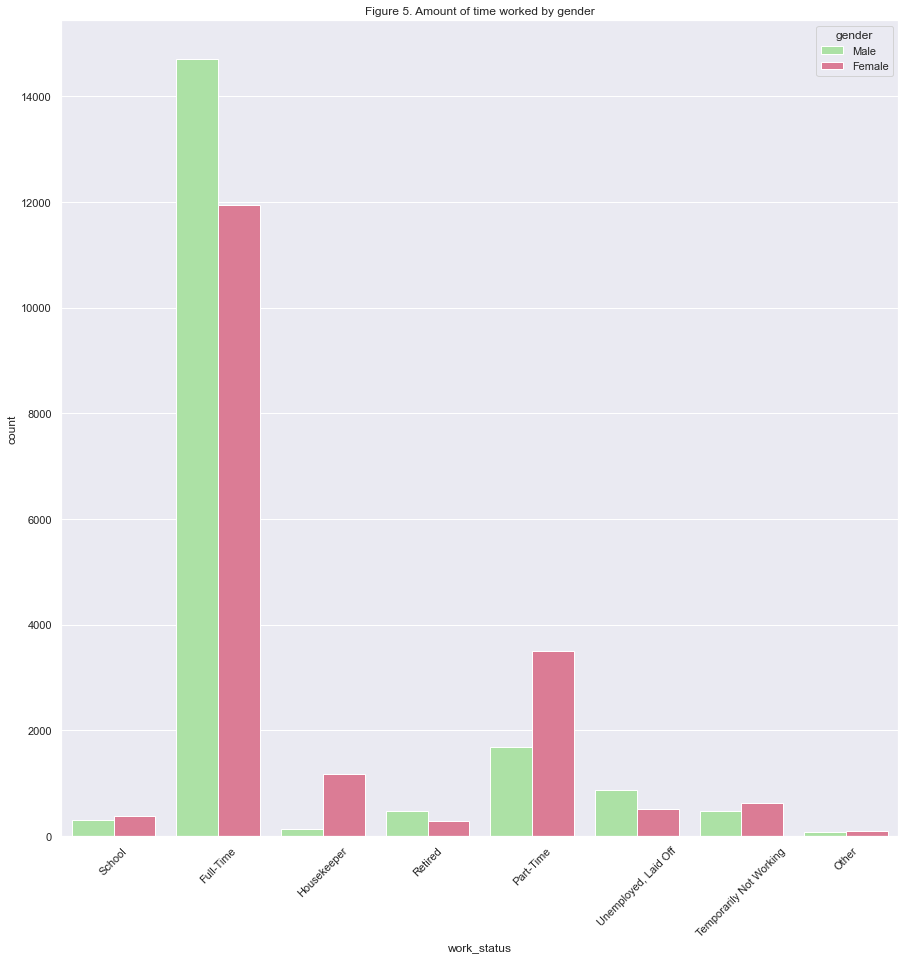

In [11]:
p = sns.countplot(data=survey_data, x="work_status", hue="gender", palette=['#a5eb9b', '#eb6c8e'])
p.set(title="Figure 5. Amount of time worked by gender")
p = p.set_xticklabels(p.get_xticklabels(), rotation=45)

There are about 1000 more men that work full time then women and about 1000 more women who work part time then men.

#### Has the wage gap changed with time?

In [12]:
older = survey_data.loc[survey_data['year'] == 1974]
newer = survey_data.loc[survey_data['year'] == 2018]
both = older.append(newer)

grouped = both.groupby(['year', 'gender'], as_index = False).income.mean()
grouped

,year,gender,income
0,1974,Female,12962.81
1,1974,Male,28721.31
2,2018,Female,19786.72
3,2018,Male,30561.93


The wage gap has appeared to change significantly over the course of this entire survey. Men's salary went up 1840.62, and Women's salary went up 6823.91. So over time the wage gap has closed by about 5000 dollars.

<AxesSubplot:title={'center':'Figure 6. Average income over the years'}, xlabel='year', ylabel='income'>

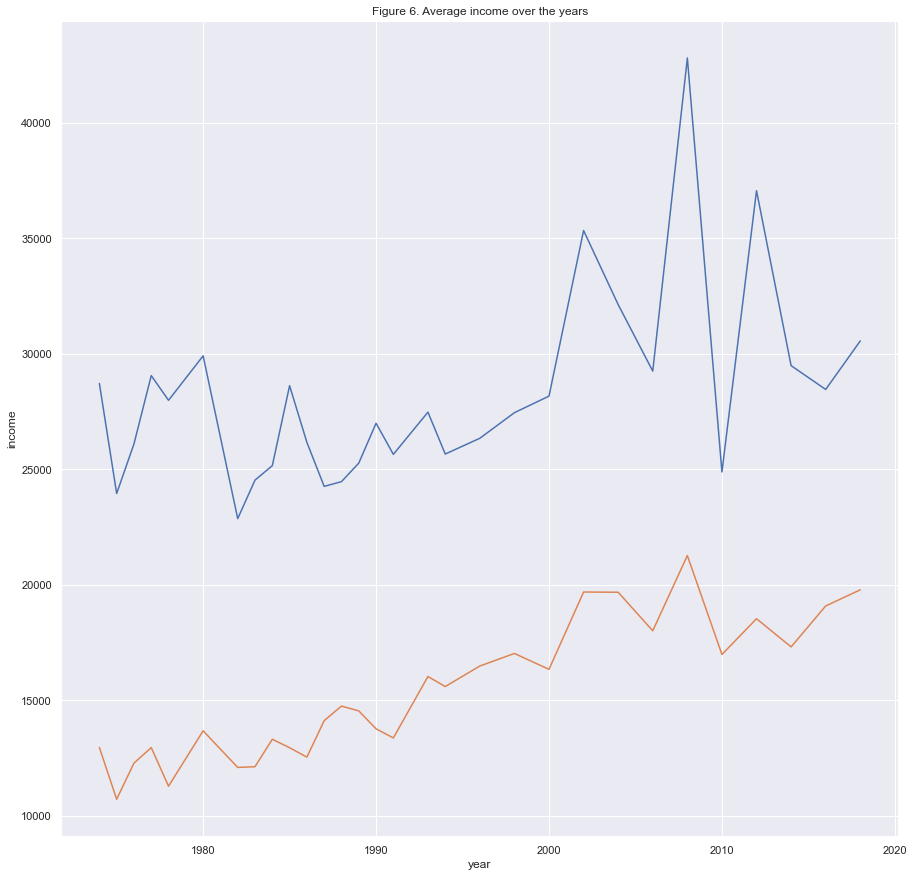

In [13]:
men = survey_data[survey_data['gender'] == 'Male'].groupby('year').income.mean()
men.plot.line(title='Figure 6. Average income over the years', ylabel = 'income')

women = survey_data[survey_data['gender'] == 'Female'].groupby('year').income.mean()
women.plot.line()

From the line plot above we can see that the average income difference is getting smaller over time. So to answer the question, the wage gap has definetely changed over time.

#### How does education effect income?

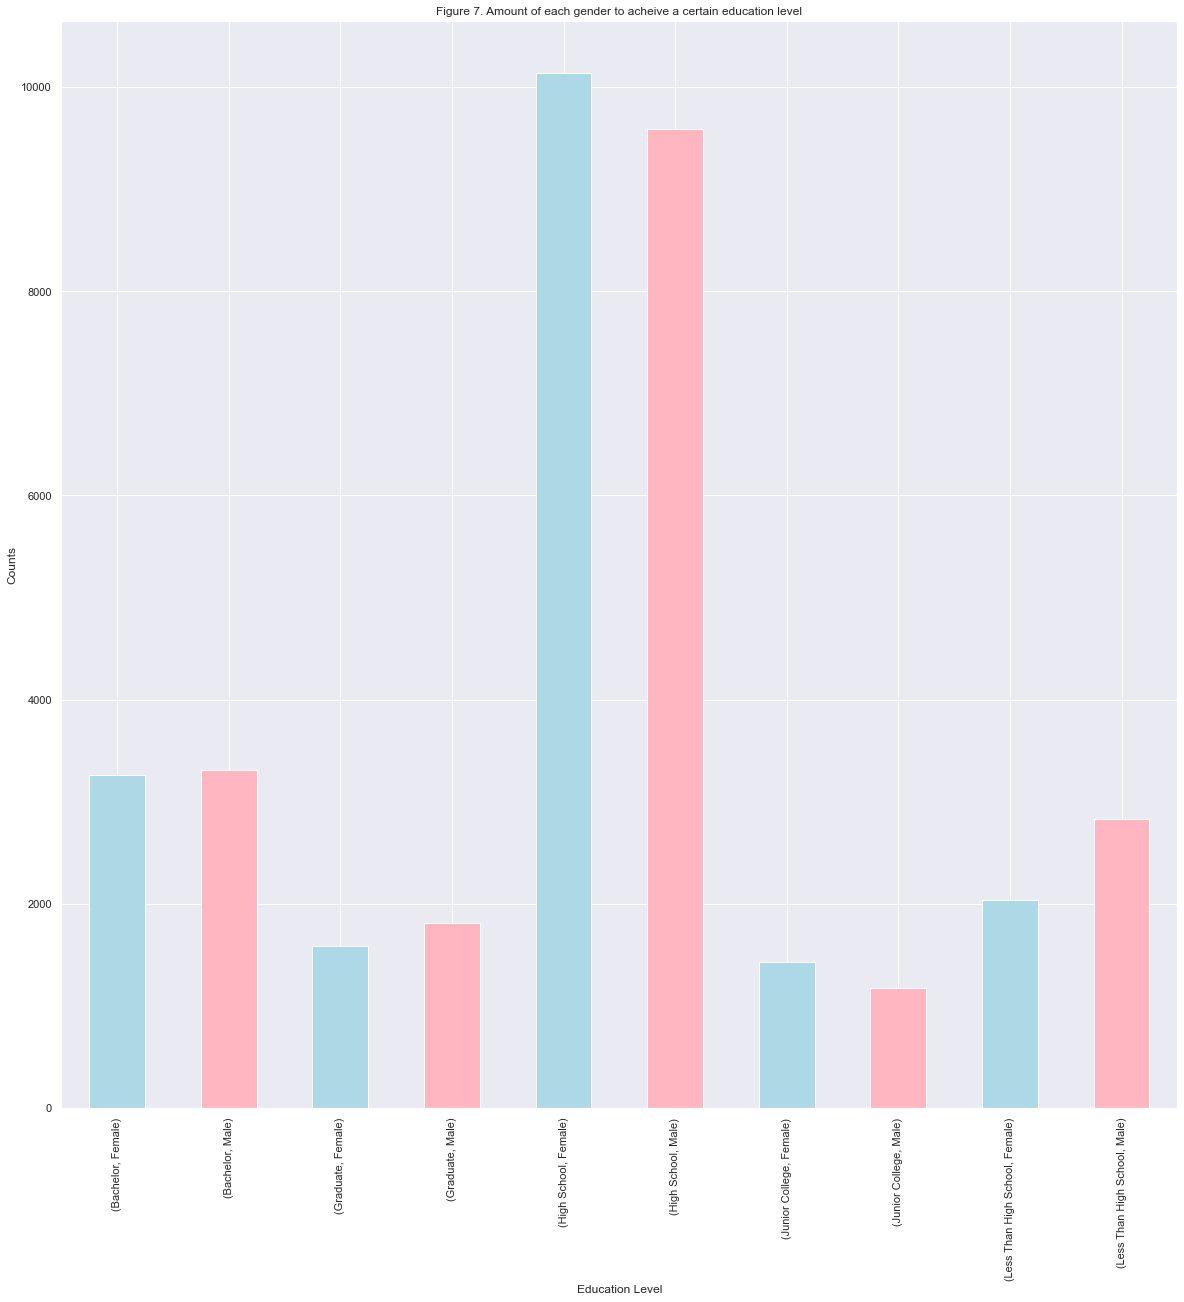

In [14]:
grouped = survey_data.groupby(['education_level', 'gender']).size()
barplot = grouped.plot.bar(color=['lightblue', 'lightpink'], figsize=(20,20),title='Figure 7. Amount of each gender to acheive a certain education level')
plt.ylabel("Counts")
plt.xlabel("Education Level")
plt.xticks(rotation=90)
plt.show(barplot)

The plot above shows that men and women have similar educations, this indicates that for this data set education shouldn't create an income difference.

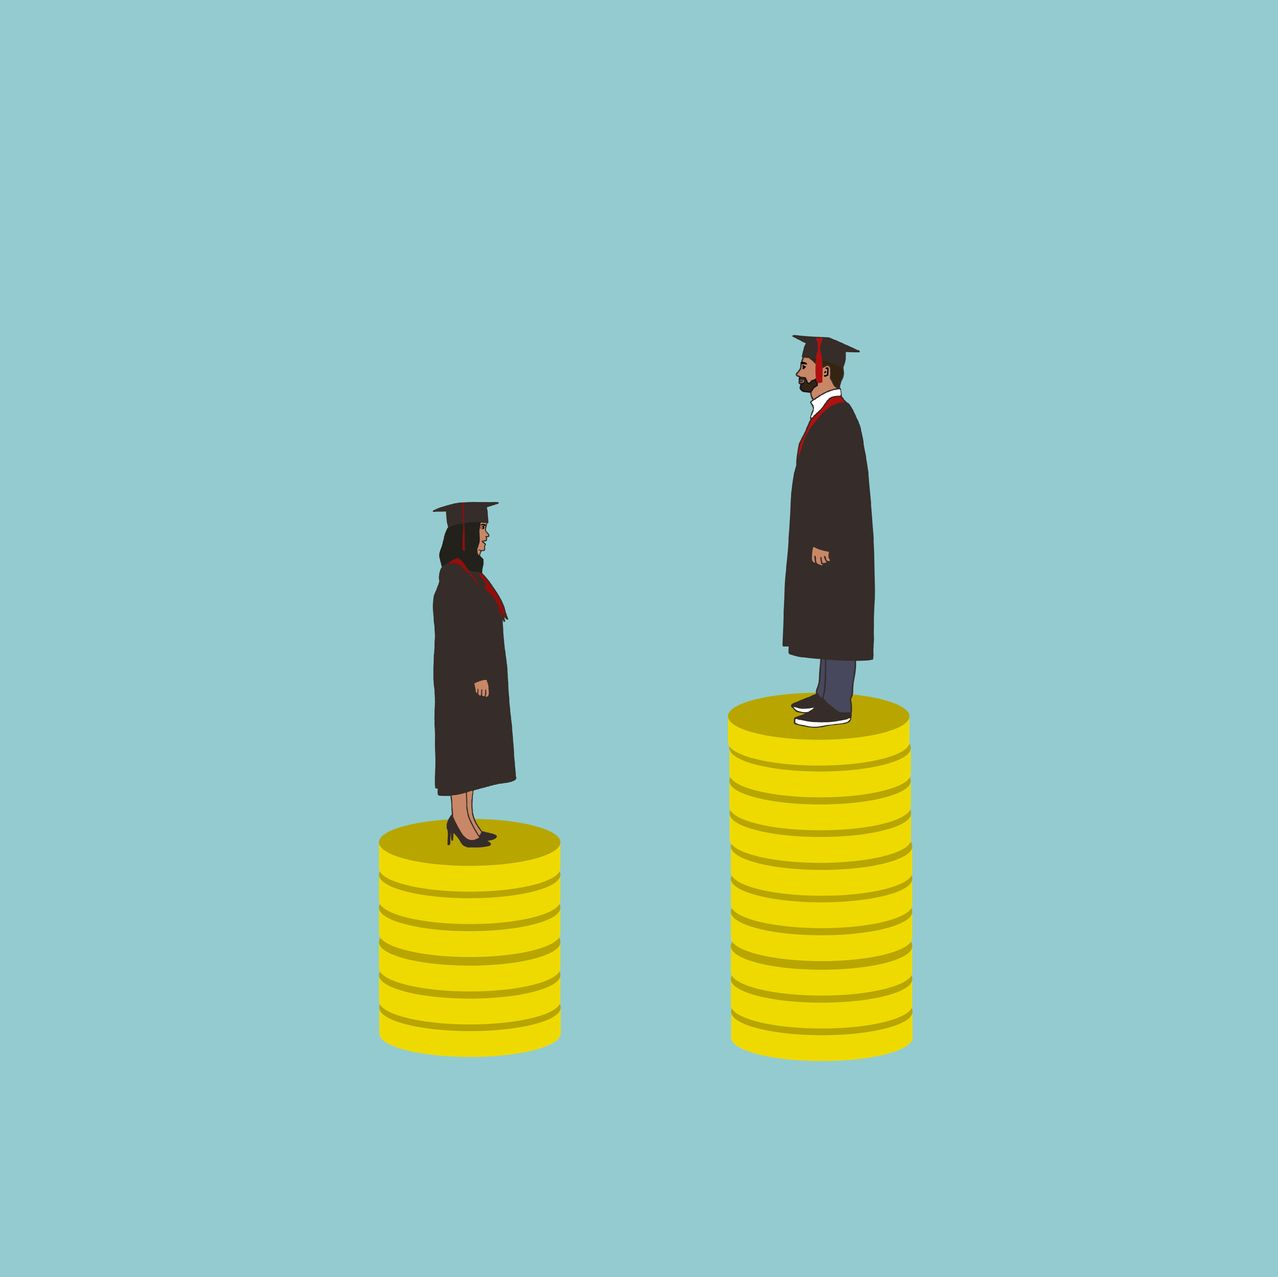

In [34]:
men = survey_data[survey_data['gender'] == 'Male']
men.groupby('education_level').income.mean()

education_level
Bachelor                 39479.27
Graduate                 55421.36
High School              23205.04
Junior College           26627.39
Less Than High School    16866.19
Name: income, dtype: float64

In [39]:
women = survey_data[survey_data['gender'] == 'Female']
women.groupby('education_level').income.mean()

education_level
Bachelor                 22275.69
Graduate                 33170.86
High School              12747.22
Junior College           17446.83
Less Than High School     8341.19
Name: income, dtype: float64

Higher education is related to a higher average income. Although Men still earn more than Women with the same education. The dataset doesn't tell us the type of degree they get. Since some degrees are more lucerative than others, Men could tend to go after more lucerative degrees.

## Discussion

It is important to note that the data set analyszed in this assingment has a roughly equal amount of men and women. This is important becuause we look at statistics related to imbalances. It's important to know that the imbalances aren't beacuse there are simply more of one gender than the other in the data set. Men make much more than Women on average, before adjusting for other factors. The first factor looked at was the proportion of gender in each occupation. Since if Men and Women tend to choose differnt occupations, and those occupatoins have differing salaries, there will be a wage gap. The graph made for this showed that Men tend to go into the higher paying jobs, and Women tend to go into lower paying ones (Figure 2). Although the in Figure 3. it is shown that even for Women who go into those higher paying jobs, they still get payed less on average. Looking into why this is, it is shown in Figure 4. that Men and Women on average have about the same prestige score. So the prestige of the jobs is not what is causing the pay to differ. Although it is important to note that there are only 11 occupations in this data set. A lot of jobs are getting pushed into the same category. Just because there are a lot of Men and Women in the business category doens't mean they are in the same kind of business. Another very important factor to take into consideration is time worked. The amount of time you work and how much you get paid shoudl have a direct relationship. It is shown in Figure 5. that there are more Men than Women who work full-time and more Women than Men who work part-time. Additionally The third highest work status for Women is a housekeeper. Housekeepers typically don't have an income, thus this brings down the average income for women. The next figure (Figure 6) shows how wages for each gender have fluctuated with time. Overall the wage gap has decreased about 7000 dollars over the entire period of this survey (1974 - 2018). Even though it is getting smaller over time, it is still substantial. The next important factor is education, since higher education is related to higher income later in life. Men and Women get roughly the same amount of education. But a man with the same education as a woman gets paid more on average. This could be because they go for more lucerative degrees, but that is outside the scope of this data.

## References

1. Source data - https://vincentarelbundock.github.io/Rdatasets/articles/data.html
2. Pandas for data manipulation
3. Seaborn for data viz
4. Matplotlib for data viz 